**Корректность проверена на Python 3.7:**
+ numpy 1.14.5

# Доверительные интервалы для доли 

## Генерация данных

In [1]:
import numpy as np

In [2]:
print(np.__version__)

1.17.4


In [3]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [4]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [5]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [6]:
from statsmodels.stats.proportion import proportion_confint

/home/agekyan/.conda/envs/psheenv/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [10]:
random_sample

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,

In [74]:
normal_interval = proportion_confint_2(1, 50, method = 'normal')

In [75]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [-0.018805, 0.058805] with width 0.077611


In [71]:
import scipy.stats as sts

In [72]:
def proportion_confint_2(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = sts.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [64]:
proportion_confint(1, 50, method = 'wilson')[0]

0.003539259271646236

In [79]:
(1 - 0.997)/2

0.0015000000000000013

### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [32]:
wilson_interval = proportion_confint(1, 50, method = 'wilson')

In [33]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.003539, 0.104954] with width 0.101415


## Размер выборки для интервала заданной ширины

In [17]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [21]:
samplesize_confint_proportion(random_sample.mean(), 0.01)

9603.49339338249

In [34]:
n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))
n_samples

753

In [35]:
n_ = {}

for p in range(0, 10000):
    print(p/10000)
    n_[p/10000]=int(np.ceil(samplesize_confint_proportion(p/10000, 0.01)))

0.0
0.0001
0.0002
0.0003
0.0004
0.0005
0.0006
0.0007
0.0008
0.0009
0.001
0.0011
0.0012
0.0013
0.0014
0.0015
0.0016
0.0017
0.0018
0.0019
0.002
0.0021
0.0022
0.0023
0.0024
0.0025
0.0026
0.0027
0.0028
0.0029
0.003
0.0031
0.0032
0.0033
0.0034
0.0035
0.0036
0.0037
0.0038
0.0039
0.004
0.0041
0.0042
0.0043
0.0044
0.0045
0.0046
0.0047
0.0048
0.0049
0.005
0.0051
0.0052
0.0053
0.0054
0.0055
0.0056
0.0057
0.0058
0.0059
0.006
0.0061
0.0062
0.0063
0.0064
0.0065
0.0066
0.0067
0.0068
0.0069
0.007
0.0071
0.0072
0.0073
0.0074
0.0075
0.0076
0.0077
0.0078
0.0079
0.008
0.0081
0.0082
0.0083
0.0084
0.0085
0.0086
0.0087
0.0088
0.0089
0.009
0.0091
0.0092
0.0093
0.0094
0.0095
0.0096
0.0097
0.0098
0.0099
0.01
0.0101
0.0102
0.0103
0.0104
0.0105
0.0106
0.0107
0.0108
0.0109
0.011
0.0111
0.0112
0.0113
0.0114
0.0115
0.0116
0.0117
0.0118
0.0119
0.012
0.0121
0.0122
0.0123
0.0124
0.0125
0.0126
0.0127
0.0128
0.0129
0.013
0.0131
0.0132
0.0133
0.0134
0.0135
0.0136
0.0137
0.0138
0.0139
0.014
0.0141
0.0142
0.0143
0.0144
0.0

0.2172
0.2173
0.2174
0.2175
0.2176
0.2177
0.2178
0.2179
0.218
0.2181
0.2182
0.2183
0.2184
0.2185
0.2186
0.2187
0.2188
0.2189
0.219
0.2191
0.2192
0.2193
0.2194
0.2195
0.2196
0.2197
0.2198
0.2199
0.22
0.2201
0.2202
0.2203
0.2204
0.2205
0.2206
0.2207
0.2208
0.2209
0.221
0.2211
0.2212
0.2213
0.2214
0.2215
0.2216
0.2217
0.2218
0.2219
0.222
0.2221
0.2222
0.2223
0.2224
0.2225
0.2226
0.2227
0.2228
0.2229
0.223
0.2231
0.2232
0.2233
0.2234
0.2235
0.2236
0.2237
0.2238
0.2239
0.224
0.2241
0.2242
0.2243
0.2244
0.2245
0.2246
0.2247
0.2248
0.2249
0.225
0.2251
0.2252
0.2253
0.2254
0.2255
0.2256
0.2257
0.2258
0.2259
0.226
0.2261
0.2262
0.2263
0.2264
0.2265
0.2266
0.2267
0.2268
0.2269
0.227
0.2271
0.2272
0.2273
0.2274
0.2275
0.2276
0.2277
0.2278
0.2279
0.228
0.2281
0.2282
0.2283
0.2284
0.2285
0.2286
0.2287
0.2288
0.2289
0.229
0.2291
0.2292
0.2293
0.2294
0.2295
0.2296
0.2297
0.2298
0.2299
0.23
0.2301
0.2302
0.2303
0.2304
0.2305
0.2306
0.2307
0.2308
0.2309
0.231
0.2311
0.2312
0.2313
0.2314
0.2315
0.2316
0

0.4417
0.4418
0.4419
0.442
0.4421
0.4422
0.4423
0.4424
0.4425
0.4426
0.4427
0.4428
0.4429
0.443
0.4431
0.4432
0.4433
0.4434
0.4435
0.4436
0.4437
0.4438
0.4439
0.444
0.4441
0.4442
0.4443
0.4444
0.4445
0.4446
0.4447
0.4448
0.4449
0.445
0.4451
0.4452
0.4453
0.4454
0.4455
0.4456
0.4457
0.4458
0.4459
0.446
0.4461
0.4462
0.4463
0.4464
0.4465
0.4466
0.4467
0.4468
0.4469
0.447
0.4471
0.4472
0.4473
0.4474
0.4475
0.4476
0.4477
0.4478
0.4479
0.448
0.4481
0.4482
0.4483
0.4484
0.4485
0.4486
0.4487
0.4488
0.4489
0.449
0.4491
0.4492
0.4493
0.4494
0.4495
0.4496
0.4497
0.4498
0.4499
0.45
0.4501
0.4502
0.4503
0.4504
0.4505
0.4506
0.4507
0.4508
0.4509
0.451
0.4511
0.4512
0.4513
0.4514
0.4515
0.4516
0.4517
0.4518
0.4519
0.452
0.4521
0.4522
0.4523
0.4524
0.4525
0.4526
0.4527
0.4528
0.4529
0.453
0.4531
0.4532
0.4533
0.4534
0.4535
0.4536
0.4537
0.4538
0.4539
0.454
0.4541
0.4542
0.4543
0.4544
0.4545
0.4546
0.4547
0.4548
0.4549
0.455
0.4551
0.4552
0.4553
0.4554
0.4555
0.4556
0.4557
0.4558
0.4559
0.456
0.4561
0

0.6563
0.6564
0.6565
0.6566
0.6567
0.6568
0.6569
0.657
0.6571
0.6572
0.6573
0.6574
0.6575
0.6576
0.6577
0.6578
0.6579
0.658
0.6581
0.6582
0.6583
0.6584
0.6585
0.6586
0.6587
0.6588
0.6589
0.659
0.6591
0.6592
0.6593
0.6594
0.6595
0.6596
0.6597
0.6598
0.6599
0.66
0.6601
0.6602
0.6603
0.6604
0.6605
0.6606
0.6607
0.6608
0.6609
0.661
0.6611
0.6612
0.6613
0.6614
0.6615
0.6616
0.6617
0.6618
0.6619
0.662
0.6621
0.6622
0.6623
0.6624
0.6625
0.6626
0.6627
0.6628
0.6629
0.663
0.6631
0.6632
0.6633
0.6634
0.6635
0.6636
0.6637
0.6638
0.6639
0.664
0.6641
0.6642
0.6643
0.6644
0.6645
0.6646
0.6647
0.6648
0.6649
0.665
0.6651
0.6652
0.6653
0.6654
0.6655
0.6656
0.6657
0.6658
0.6659
0.666
0.6661
0.6662
0.6663
0.6664
0.6665
0.6666
0.6667
0.6668
0.6669
0.667
0.6671
0.6672
0.6673
0.6674
0.6675
0.6676
0.6677
0.6678
0.6679
0.668
0.6681
0.6682
0.6683
0.6684
0.6685
0.6686
0.6687
0.6688
0.6689
0.669
0.6691
0.6692
0.6693
0.6694
0.6695
0.6696
0.6697
0.6698
0.6699
0.67
0.6701
0.6702
0.6703
0.6704
0.6705
0.6706
0.6707
0

0.88
0.8801
0.8802
0.8803
0.8804
0.8805
0.8806
0.8807
0.8808
0.8809
0.881
0.8811
0.8812
0.8813
0.8814
0.8815
0.8816
0.8817
0.8818
0.8819
0.882
0.8821
0.8822
0.8823
0.8824
0.8825
0.8826
0.8827
0.8828
0.8829
0.883
0.8831
0.8832
0.8833
0.8834
0.8835
0.8836
0.8837
0.8838
0.8839
0.884
0.8841
0.8842
0.8843
0.8844
0.8845
0.8846
0.8847
0.8848
0.8849
0.885
0.8851
0.8852
0.8853
0.8854
0.8855
0.8856
0.8857
0.8858
0.8859
0.886
0.8861
0.8862
0.8863
0.8864
0.8865
0.8866
0.8867
0.8868
0.8869
0.887
0.8871
0.8872
0.8873
0.8874
0.8875
0.8876
0.8877
0.8878
0.8879
0.888
0.8881
0.8882
0.8883
0.8884
0.8885
0.8886
0.8887
0.8888
0.8889
0.889
0.8891
0.8892
0.8893
0.8894
0.8895
0.8896
0.8897
0.8898
0.8899
0.89
0.8901
0.8902
0.8903
0.8904
0.8905
0.8906
0.8907
0.8908
0.8909
0.891
0.8911
0.8912
0.8913
0.8914
0.8915
0.8916
0.8917
0.8918
0.8919
0.892
0.8921
0.8922
0.8923
0.8924
0.8925
0.8926
0.8927
0.8928
0.8929
0.893
0.8931
0.8932
0.8933
0.8934
0.8935
0.8936
0.8937
0.8938
0.8939
0.894
0.8941
0.8942
0.8943
0.8944
0.

In [51]:
list(n_.keys())

[0.0,
 0.0001,
 0.0002,
 0.0003,
 0.0004,
 0.0005,
 0.0006,
 0.0007,
 0.0008,
 0.0009,
 0.001,
 0.0011,
 0.0012,
 0.0013,
 0.0014,
 0.0015,
 0.0016,
 0.0017,
 0.0018,
 0.0019,
 0.002,
 0.0021,
 0.0022,
 0.0023,
 0.0024,
 0.0025,
 0.0026,
 0.0027,
 0.0028,
 0.0029,
 0.003,
 0.0031,
 0.0032,
 0.0033,
 0.0034,
 0.0035,
 0.0036,
 0.0037,
 0.0038,
 0.0039,
 0.004,
 0.0041,
 0.0042,
 0.0043,
 0.0044,
 0.0045,
 0.0046,
 0.0047,
 0.0048,
 0.0049,
 0.005,
 0.0051,
 0.0052,
 0.0053,
 0.0054,
 0.0055,
 0.0056,
 0.0057,
 0.0058,
 0.0059,
 0.006,
 0.0061,
 0.0062,
 0.0063,
 0.0064,
 0.0065,
 0.0066,
 0.0067,
 0.0068,
 0.0069,
 0.007,
 0.0071,
 0.0072,
 0.0073,
 0.0074,
 0.0075,
 0.0076,
 0.0077,
 0.0078,
 0.0079,
 0.008,
 0.0081,
 0.0082,
 0.0083,
 0.0084,
 0.0085,
 0.0086,
 0.0087,
 0.0088,
 0.0089,
 0.009,
 0.0091,
 0.0092,
 0.0093,
 0.0094,
 0.0095,
 0.0096,
 0.0097,
 0.0098,
 0.0099,
 0.01,
 0.0101,
 0.0102,
 0.0103,
 0.0104,
 0.0105,
 0.0106,
 0.0107,
 0.0108,
 0.0109,
 0.011,
 0.0111,
 0.0112

In [54]:
n_[0.5]

9604

In [56]:
n_[0.49]

9600

In [58]:
max(list(n_.values()))

9604

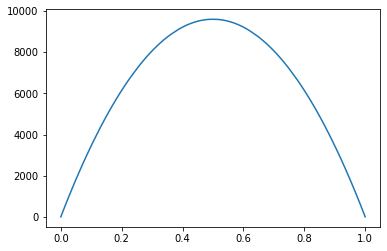

In [53]:
pylab.plot(list(n_.keys()), list(n_.values()))

In [42]:
plt..plot(random_sample)

AttributeError: module 'matplotlib' has no attribute 'plot'

In [40]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [41]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [17]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997
